In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data


In [2]:
df= pd.read_csv('student_scores.csv')

In [3]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


# Data Cleaning

In [4]:
df = df.drop('Unnamed: 0', axis=1)
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


In [5]:
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

In [6]:
f"Rows:{df.shape[0]},columns:{df.shape[1]}"

'Rows:30641,columns:14'

# Data Analysis


In [7]:
df["TransportMeans"] = df["TransportMeans"].str.replace('school_bus', "Van")
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0            Van   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0            Van   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0            Van   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


# Exploratory Data Analysis

### Gender Distribution

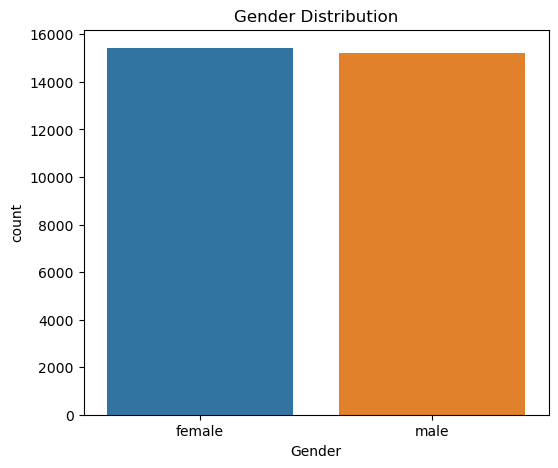

In [8]:
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x="Gender")
plt.title("Gender Distribution")
plt.show()


The gender distribution countplot shows the proportion of male and female students. If the dataset is balanced (roughly equal male and female students), any differences in performance observed later could be attributed to other factors, such as teaching methods or socio-economic background, rather than sampling bias.
If the distribution is unbalanced, it might require gender-specific interventions or highlight that one gender is underrepresented in the data.

### Student Performance by Gender

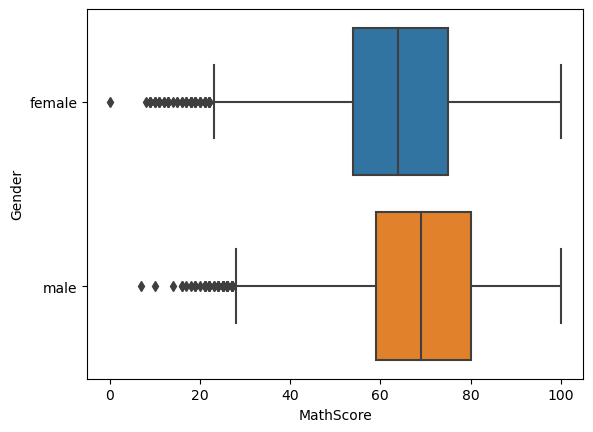

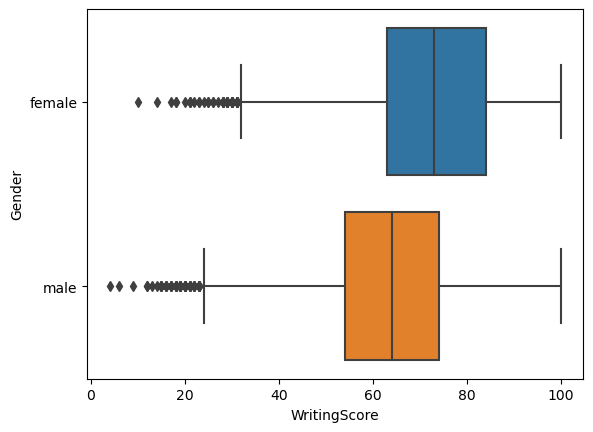

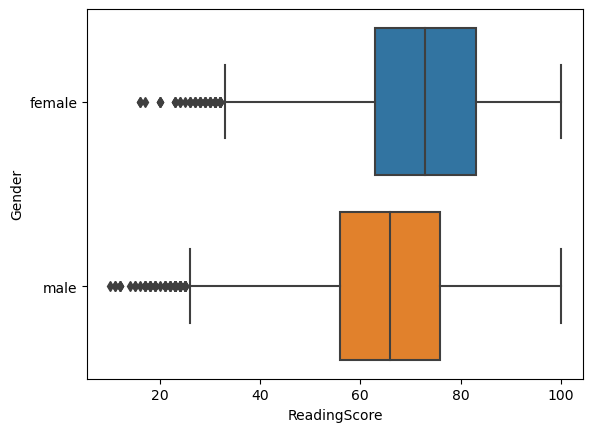

In [9]:
sns.boxplot(data=df, x="MathScore", y="Gender")
plt.show()

sns.boxplot(data=df, x="WritingScore", y="Gender")
plt.show()

sns.boxplot(data=df, x="ReadingScore" ,y="Gender")
plt.show()


The analysis of student performance by gender shows notable trends. In math, if males outperform females, it may reflect broader societal patterns where girls are less encouraged in STEM. In contrast, if females perform better in writing and reading, it aligns with trends seen in language-based subjects. Outliers indicate both high-performing and struggling students across genders, highlighting the need for personalized support. While these general trends are important, the focus should be encouraging gender equity in all subjects and providing targeted assistance to students, ensuring all have equal opportunities to succeed academically.

### Parent Marital Status distribution

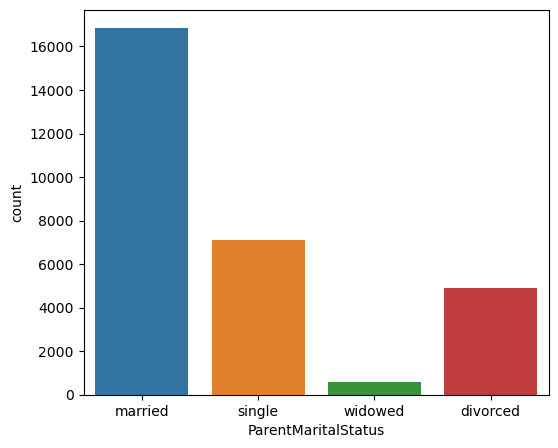

In [10]:
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x="ParentMaritalStatus")
plt.show()


From the analysis of Parent Marital Status distribution, I noticed that if most students come from married parents, this could indicate that family structure plays a significant role in the datasets overall performance trends. A more balanced distribution of marital statuses allows for better comparisons of how different family dynamics affect students. However, when certain marital statuses, like single or separated parents, are underrepresented, There is need to be cautious in interpreting the effect on student performance. With small sample sizes, conclusions might not fully capture broader trends.

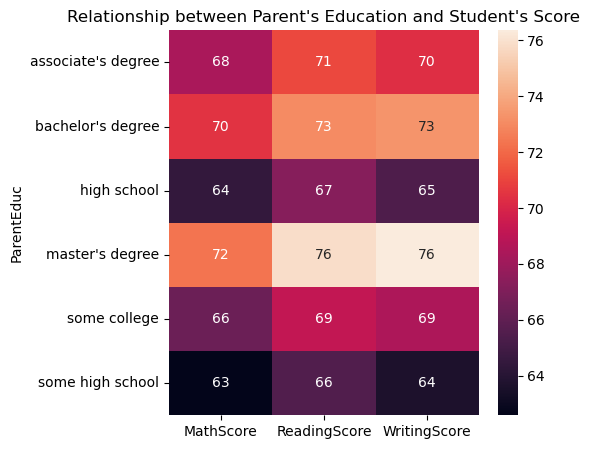

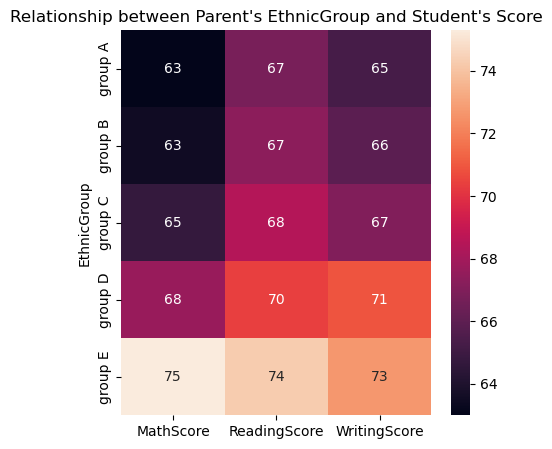

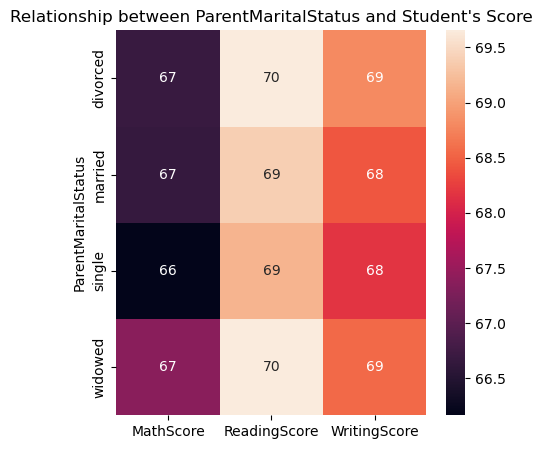

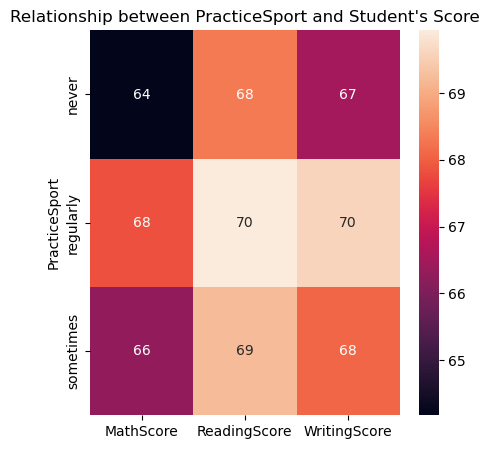

In [11]:

gb = df.groupby("ParentEduc").agg({"MathScore": "mean", "ReadingScore": "mean", "WritingScore": "mean"})
plt.figure(figsize=(5, 5))
sns.heatmap(gb, annot=True)
plt.title("Relationship between Parent's Education and Student's Score")
plt.show()

gb = df.groupby("EthnicGroup").agg({"MathScore": "mean", "ReadingScore": "mean", "WritingScore": "mean"})
plt.figure(figsize=(5, 5))
sns.heatmap(gb, annot=True)
plt.title("Relationship between Parent's EthnicGroup and Student's Score")
plt.show()

gb = df.groupby("ParentMaritalStatus").agg({"MathScore": "mean", "ReadingScore": "mean", "WritingScore": "mean"})
plt.figure(figsize=(5, 5))
sns.heatmap(gb, annot=True)
plt.title("Relationship between ParentMaritalStatus and Student's Score")
plt.show()

gb = df.groupby("PracticeSport").agg({"MathScore": "mean", "ReadingScore": "mean", "WritingScore": "mean"})
plt.figure(figsize=(5, 5))
sns.heatmap(gb, annot=True)
plt.title("Relationship between PracticeSport and Student's Score")
plt.show()


From the heatmap comparing sports participation with academic performance, I noticed some interesting patterns. If students who engage in sports tend to have higher scores, it aligns with research showing that physical activity can enhance concentration and discipline, leading to better academic outcomes. However, if students who practice sports show lower scores, it suggests a potential conflict between time spent on sports and academics. This indicates a need for better time management support for student-athletes. These insights could help schools develop policies that strike a balance between academic success and extractivities involvement, ensuring students thrive in both areas.

### Students Overall Score Performance

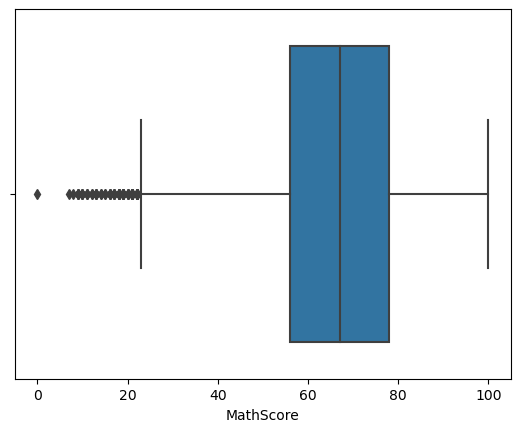

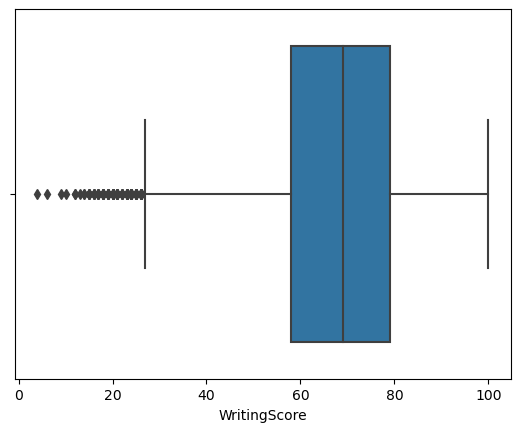

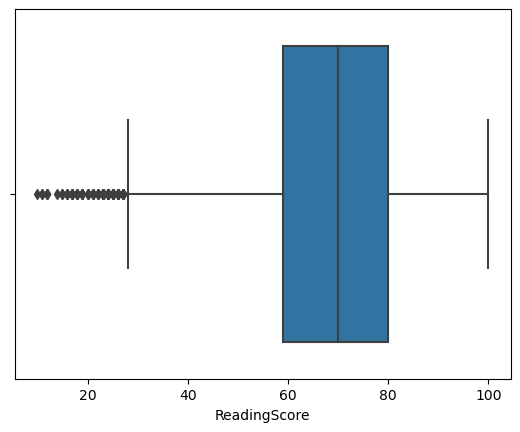

In [12]:
sns.boxplot(data=df, x="MathScore")
plt.show()

sns.boxplot(data=df, x="WritingScore")
plt.show()

sns.boxplot(data=df, x="ReadingScore")
plt.show()

I noticed important differences in how boys and girls perform in school, which suggests that we need to create programs that support their unique learning needs. The impact of parents' education and marital status shows how family background plays a big role in student success. I also found that differences in performance among ethnic groups highlight the need for fairness in education so that all students have equal chances to succeed. Additionally, the connection between sports participation and academic results suggests that schools should help student-athletes balance their studies and sports. Finally, looking at the overall score distribution helps identify which subjects need more attention and support. These findings highlight the importance of addressing the various factors that affect academic performance to ensure that all students receive the help they need to do well.